![](https://blog.socialcops.com/wp-content/uploads/2016/07/OG-MachineLearning-Python-Titanic-Kaggle.png)

# 1. Problem Statement

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

# 2. Data Understanding

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
df1 = pd.read_csv('train.csv')

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1, inplace=True )

In [5]:
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

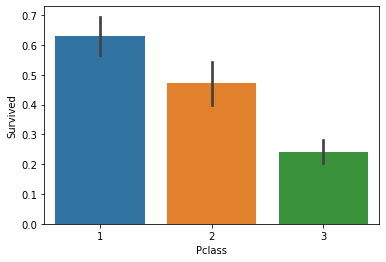

In [6]:
sns.barplot(x=df1['Pclass'],y=df1['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

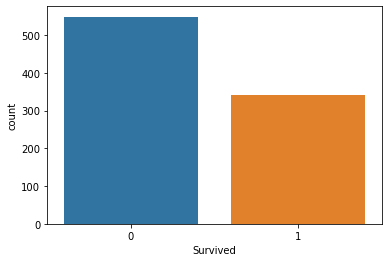

In [7]:
sns.countplot(x=df1['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

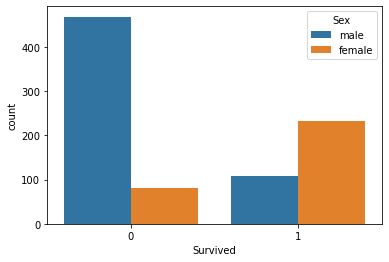

In [8]:
sns.countplot(x=df1['Survived'] , hue = df1["Sex"])

In [9]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [10]:
df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# 3. Data Prepration

In [11]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

In [12]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [13]:
l_sex_dummies=pd.get_dummies(df1['Sex'],drop_first=True)

In [14]:
df1= pd.concat([df1,l_sex_dummies],axis=1)

In [15]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [16]:
df1.drop(['Sex'], axis=1, inplace=True )

In [17]:
df1.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [18]:
from sklearn.preprocessing import StandardScaler
sts =StandardScaler()

In [19]:
feature_scale = ['Age','Fare']
df1[feature_scale] = sts.fit_transform(df1[feature_scale])

In [20]:
df1.head()

,Survived,Pclass,Age,Fare,male
0,0,3,-0.592481,-0.502445,1
1,1,1,0.638789,0.786845,0
2,1,3,-0.284663,-0.488854,0
3,1,1,0.407926,0.420730,0
4,0,3,0.407926,-0.486337,1


In [21]:
X=df1.drop(['Survived'],axis=1)
y=df1['Survived']

# 4. Data Modeling

In [37]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}

In [38]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

# 5. Model Evaluation

In [41]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.775607,{'criterion': 'gini'}
1,KNeighborsClassifier,0.802492,{'n_neighbors': 5}
2,SVC,0.811481,"{'C': 100, 'kernel': 'rbf'}"


In [22]:
model_svc = SVC( C= 100,kernel='rbf')

In [23]:
model_svc.fit(X, y)

SVC(C=100)

In [25]:
df2 = pd.read_csv('test.csv')

In [26]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
df3=df2.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1 )

In [28]:
df3.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [29]:
df3['Age'].fillna(df3['Age'].mean(),inplace=True)
df3['Fare'].fillna(df3['Fare'].mean(),inplace=True)

In [30]:
l_sex_dummies=pd.get_dummies(df3['Sex'],drop_first=True)
df3= pd.concat([df3,l_sex_dummies],axis=1)
df3.drop(['Sex'], axis=1, inplace=True )

In [31]:
df3.head()

,Pclass,Age,Fare,male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [32]:
df3[feature_scale] = sts.fit_transform(df3[feature_scale])

In [33]:
df3.head()

,Pclass,Age,Fare,male
0,3,0.334993,-0.498407,1
1,3,1.325530,-0.513274,0
2,2,2.514175,-0.465088,1
3,3,-0.259330,-0.483466,1
4,3,-0.655545,-0.418471,0


In [34]:
y_predicted = model_svc.predict(df3)

# 6. Conclusion

In [35]:
submission = pd.DataFrame({
        "PassengerId": df2['PassengerId'],
        "Survived": y_predicted
    })

In [36]:
submission.to_csv('titanic_submission_v02.csv', index=False)